In [1]:
import pandas as pd
import numpy as np

In [2]:
#A cleaned version Brazil MST data (only for 2005)
data = pd.read_stata('C:/Users/user/Desktop/Advanced Data Analysis with Python 9.9.22/Datasets/Brazil MST data 2005.dta')
data.columns

Index(['ibgecode', 'state', 'latitude', 'longitude', 'invasions_count',
       'reforms_count', 'invasions_count_cum', 'invasions_dum', 'log_income',
       'ln_agriculturalproductivity', 'codigo', 'PT_voteshare',
       'infantmortality', 'BF_coverage1000', 'log_invasions_count_cum',
       'log_intended_lands1995'],
      dtype='object')

### Installation of Geopandas

In [ ]:
#pip install geopandas

If you get trouble while installing geopandas, follow the conda way. Please follow the conda section in the following link: https://geopandas.org/en/stable/getting_started/install.html

Summary, run following codes in anaconda prompt, give your permission if asked:

1. conda install --channel conda-forge geopandas

2. conda create -n geo_env

3. conda activate geo_env

4. conda config --env --add channels conda-forge

5. conda config --env --set channel_priority strict

6. conda install python=3 geopandas


Then, activate geo_env in the anaconda prompt, and call "jupyter notebook" in that environment. Then you are using your notebook in a separate place. Note that, python might ask you to install some packages again, you are in a new zone.

In [3]:
import geopandas

### Read, merge, and plot

In [4]:
import geopandas as gpd

shapefile = gpd.read_file("BR/BRMUE250GC_SIR.shp")
print(shapefile)

       ibgecode                                           geometry
0     1501956.0  POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...
1     2111250.0  POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...
2     5201454.0  POLYGON ((-51.14230 -18.29672, -51.14236 -18.2...
3     5202353.0  POLYGON ((-51.69953 -16.23270, -51.69957 -16.2...
4     1502855.0  POLYGON ((-55.17193 -1.83331, -55.16647 -1.731...
...         ...                                                ...
5567  3535507.0  POLYGON ((-50.69420 -22.39885, -50.69410 -22.3...
5568  5200209.0  POLYGON ((-48.86197 -17.98972, -48.86111 -17.9...
5569  4316808.0  POLYGON ((-52.46848 -29.70647, -52.46847 -29.7...
5570  4217303.0  POLYGON ((-53.10221 -26.93414, -53.10236 -26.9...
5571  2611705.0  POLYGON ((-35.94368 -8.06130, -35.93697 -8.047...

[5572 rows x 2 columns]


<AxesSubplot:>

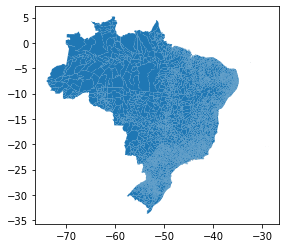

In [5]:
shapefile.plot()
#we don't have any varaible yet, only ibgecode and geometry

In [6]:
#Let's merge them
merged_data = shapefile.merge(data, on='ibgecode')

In [39]:
area = shapefile.geometry.area
ibgecode = shapefile.ibgecode
ibgecode = pd.Series(ibgecode)
area = pd.Series(area)
area.to_csv('area.csv')
ibgecode.to_csv('ibgecode.csv')

C:\Users\user\AppData\Local\Temp/ipykernel_18624/1001226091.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = shapefile.geometry.area


In [ ]:
merged_data.plot()

In [ ]:
merged_data.boundary

In [ ]:
merged_data.boundary[15]

In [ ]:
merged_data.centroid

In [ ]:
merged_data.centroid[15]

In [ ]:
merged_data.head()

In [ ]:
# Check what kind of object merged_data is
type(merged_data)

In [ ]:
# Check the type of the geometry attribute
type(merged_data.geometry)

In [ ]:
# Inspect the first rows of the geometry
merged_data.geometry.head()

In [ ]:
merged_data.geometry[15]

In [ ]:
# Inspect the area of the municipalities
merged_data.geometry.area

In [ ]:
merged_data.geometry.area[15]

In [ ]:
#Plot by invasion count
merged_data.plot(column='invasions_count_cum')

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
merged_data.plot(column='log_income', ax=ax, legend=True)

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='log_income', cmap='OrRd', scheme='quantiles', ax=ax, legend=True)
ax.set_axis_off()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='log_income', ax=ax, legend=True, 
                 legend_kwds={'label': "Income by municipality", 'orientation': "horizontal"})

In [ ]:
merged_data.boundary.plot(figsize=(10, 10))

In [ ]:
invasions = merged_data[merged_data['invasions_count_cum'] >= 1]

In [ ]:
inv_plot = invasions.plot(marker='*', color='red', markersize=5, figsize=(10, 10))
inv_plot.set_axis_off()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(ax=ax, color='black')

invasions.plot(ax=ax, color='red')

ax.set_axis_off()
plt.show()

In [ ]:
base = merged_data.plot(color='black', figsize=(10, 10))
invasions.plot(ax=base, color='red', markersize=5)

In [ ]:
base = merged_data.plot(color='lightgray', edgecolor='grey', linewidth=0.1, figsize=(10, 10))
invasions.plot(ax=base, marker='o', color='red', markersize=5)

In [ ]:
merged_data_points = merged_data.copy()
merged_data_points['geometry'] = merged_data_points['geometry'].centroid

fig, ax = plt.subplots(figsize=(10,10))

merged_data.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.1)

merged_data_points.plot(ax=ax, color="red", markersize="invasions_count_cum", 
                        scheme="quantiles", alpha=0.5, categorical=False, legend=True )
ax.set_axis_off()
plt.show()

In [ ]:
merged_data_points = merged_data.copy()
merged_data_points['geometry'] = merged_data_points['geometry'].centroid

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Land Invasions and Bolsa Familia in Brazil')

merged_data.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.1)

merged_data_points.plot(ax=ax, color="lightcoral", markersize="invasions_count_cum", 
                        scheme="quantiles", alpha=1, categorical=False)

merged_data_points.plot(ax=ax, color="royalblue", markersize="BF_coverage1000", 
                        scheme="quantiles", alpha=0.05, categorical=False)

ax.set_axis_off()
plt.show()
    

https://matplotlib.org/stable/gallery/color/named_colors.html

### Spatial weight matrix

In [ ]:
#pip install pysal

1. conda install --channel conda-forge pysal

(skip second step if you created the geo_env above)

2. conda create -n geo_env

3. conda activate geo_env

4. conda config --env --add channels conda-forge

5. conda config --env --set channel_priority strict

6. conda install python=3 pysal

In [ ]:
import pysal as ps

In [ ]:
import libpysal

In [ ]:
from libpysal.weights import Queen, Rook, KNN

Queen: More inclusive, catches any vertex

Rook: Considers edges

KNN: Equal number of neighbors for each, according to distances

In [ ]:
w_knn1 = KNN.from_shapefile('BR/BRMUE250GC_SIR.shp')

In [ ]:
type(w_knn1)

In [ ]:
len(w_knn1.neighbors)

In [ ]:
w_knn1.neighbors

In [ ]:
w_knn3 = KNN.from_shapefile('BR/BRMUE250GC_SIR.shp',3) #default was 2

In [ ]:
w_knn3.neighbors

In [ ]:
w_queen = Queen.from_shapefile('BR/BRMUE250GC_SIR.shp')

In [ ]:
len(w_queen.neighbors)

In [ ]:
w_queen.neighbors

In [ ]:
w_rook = Rook.from_shapefile('BR/BRMUE250GC_SIR.shp')

In [ ]:
len(w_rook.neighbors)

In [ ]:
w_rook.neighbors

In [ ]:
w_rook.neighbors[4]

In [ ]:
w_queen.neighbors[4]

In [ ]:
#We can call weight object directly from the dataframe
wq = libpysal.weights.Queen.from_dataframe(merged_data)
wq

In [ ]:
#We need to standardize our weights with respect to rows
wq.transform = 'r'

### Produce spatial lags

In [ ]:
merged_data['invasions_count_splag'] = libpysal.weights.lag_spatial(wq, merged_data['invasions_count'])

In [ ]:
merged_data['invasions_count_splag'],merged_data['invasions_count']

In [ ]:
merged_data['invasions_count'].corr(merged_data['invasions_count_splag'])

In [ ]:
merged_data['BF_coverage1000_splag'] = libpysal.weights.lag_spatial(wq, merged_data['BF_coverage1000'])
merged_data['BF_coverage1000'].corr(merged_data['BF_coverage1000_splag'])

!!! Spatial autocorrelation alert !!!

In [ ]:
merged_data['log_income_splag'] = libpysal.weights.lag_spatial(wq, merged_data['log_income'])
merged_data['ln_agriculturalproductivity_splag'] = libpysal.weights.lag_spatial(wq, merged_data['ln_agriculturalproductivity'])
merged_data['PT_voteshare_splag'] = libpysal.weights.lag_spatial(wq, merged_data['PT_voteshare'])
merged_data['infantmortality_splag'] = libpysal.weights.lag_spatial(wq, merged_data['infantmortality'])

import seaborn as sns

fig = plt.subplots(figsize=(15, 15))
sns.heatmap(merged_data[['invasions_count', 'invasions_count_splag', 'log_income', 'log_income_splag', 
                        'ln_agriculturalproductivity','ln_agriculturalproductivity_splag', 'PT_voteshare',
                        'PT_voteshare_splag','infantmortality','infantmortality_splag']].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Run the Spatial regression

http://darribas.org/gds_scipy16/ipynb_md/08_spatial_regression.html

In [ ]:
merged_data = merged_data.dropna(axis=0)

In [ ]:
#pip install spreg

In [ ]:
import spreg

In [ ]:
#spreg only works with numpy arrays

In [ ]:
y = merged_data['BF_coverage1000'].values

In [ ]:
x_OLS = merged_data[['invasions_count_cum', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values
x_OLS

In [ ]:
#We can redefine a weighting matrix, reading neighbors and weights
#from libpysal.weights import W
#w_matrix = W(wq.neighbors, wq.weights)

In [ ]:
#We dropped some observations, then we need to recalculate the weights, to keep the total size consistent 
wq = libpysal.weights.Queen.from_dataframe(merged_data)
wq.transform = 'r'

##### OLS with spreg

In [ ]:
model_OLS = spreg.OLS(
    y[:, None],
    x_OLS,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_OLS.summary)

DIAGNOSTICS FOR SPATIAL DEPENDENCE: The main summary from the diagnostics for spatial dependence is that there is clear evidence to reject the null of spatial randomness in the residuals, hence an explicitly spatial approach is warranted.

##### Including Spatial lag of X

In [ ]:
x_splag_X = merged_data[['invasions_count_cum', 'invasions_count_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values

In [ ]:
model_splag_of_X = spreg.OLS(
    y[:, None],
    x_splag_X,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'invasions_count_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_splag_of_X.summary)

#### Try OLS for the same model:

In [ ]:
import statsmodels.api as sm
x_splag_X1 = sm.add_constant(x_splag_X)
model = sm.OLS(y, x_splag_X1)
model_result = model.fit()
model_result.summary()

##### Including Spatial lag of Y

In [ ]:
x_splag_Y = merged_data[['invasions_count_cum', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values

In [ ]:
model_splag_of_Y = spreg.OLS(
    y[:, None],
    x_splag_Y,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_splag_of_Y.summary)

##### Including both spatial lags

In [ ]:
x_splags = merged_data[['invasions_count_cum', 'invasions_count_splag', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values

In [ ]:
model_splags_both= spreg.OLS(
    y[:, None],
    x_splags,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'invasions_count_splag', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_splags_both.summary)

!!!! Let's compare results !!!!

In [ ]:
from sklearn.metrics import mean_squared_error as mse

mses = pd.Series({'OLS': mse(y, model_OLS.predy.flatten()),
                     'splag_of_X': mse(y, model_splag_of_X.predy.flatten()),
                     'splag_of_Y': mse(y, model_splag_of_Y.predy.flatten()),
                     'both_splags': mse(y, model_splags_both.predy.flatten())
                    })
mses.sort_values()

### IV2sls with spatial lags

In [ ]:
#If you are working in geo_env, your environment probably does not have "linearmodels" package. Then pip it!
#pip install linearmodels

In [ ]:
type(merged_data)

In [ ]:
#Conver geopandas dataframe into a pandas dataframe object
merged_data_pd = pd.DataFrame(merged_data)

In [ ]:
type(merged_data_pd)

In [ ]:
import linearmodels
from linearmodels.iv import IV2SLS
sp_formula = 'BF_coverage1000 ~ 1 + log_income + ln_agriculturalproductivity + PT_voteshare + infantmortality + BF_coverage1000_splag + invasions_count_splag + [log_invasions_count_cum ~ log_intended_lands1995]'
iv2sls = IV2SLS.from_formula(sp_formula, merged_data_pd).fit()
iv2sls